Decision Treeによる機械学習を実行してみる。[参考ドキュメント](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)

In [1]:
from IPython.display import Image
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris, load_boston
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import sys

%matplotlib inline


print(sys.version_info)

sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)


### 1. DecisionTreeClassifier

目的変数がクラスであるデータに対してDecisionTreeのクラス分類器である[DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)を用いてみる。

#### 1.1 解析するデータの読み込み

iris (機械学習でよく使われるあやめのデータセット) を読み込む。

In [2]:
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target

サンプルサイズは150である。  
そして説明変数としてとしてsepal length (がくの長さ), sepal width (がくの幅), petal length (花びらの長さ), petal width (花びらの幅)がある。

In [3]:
X_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


目的変数はあやめの種類である。0: setosa, 1: versicolor, 2: virginica

In [4]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

サンプルサイズと説明変数の数はshapeに保存されている。

In [5]:
X_iris.shape

(150, 4)

#### 1.2 機械学習

In [6]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_iris, y_iris)
y_predicted = clf.predict(X_iris)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)関数を用いてTraining setの正答率を求めてみる。

In [7]:
accuracy_score(y_predicted, y_iris) *100

100.0

正答率は100%であった。

これはデフォルトでは、完全にデータを分離されるかあるいはノードに含まれるデータが最低2つになるまで  
ノードを伸長していくように設定されているからである。

#### 1.3 決定木の視覚化

##### 1.3.1 Graphvizがインストールされている場合

Scikit-learnのDecusion Treeを用いてノードを視覚化するには `Graphviz` を使用する。  
*chemowakate/tutorial-7th のDockerイメージを使用している場合は`Graphviz`およびPythonモジュール`graphviz`をインストール済み 
  
[Graphviz | Graphviz - Graph Visualization Software](http://www.graphviz.org/)

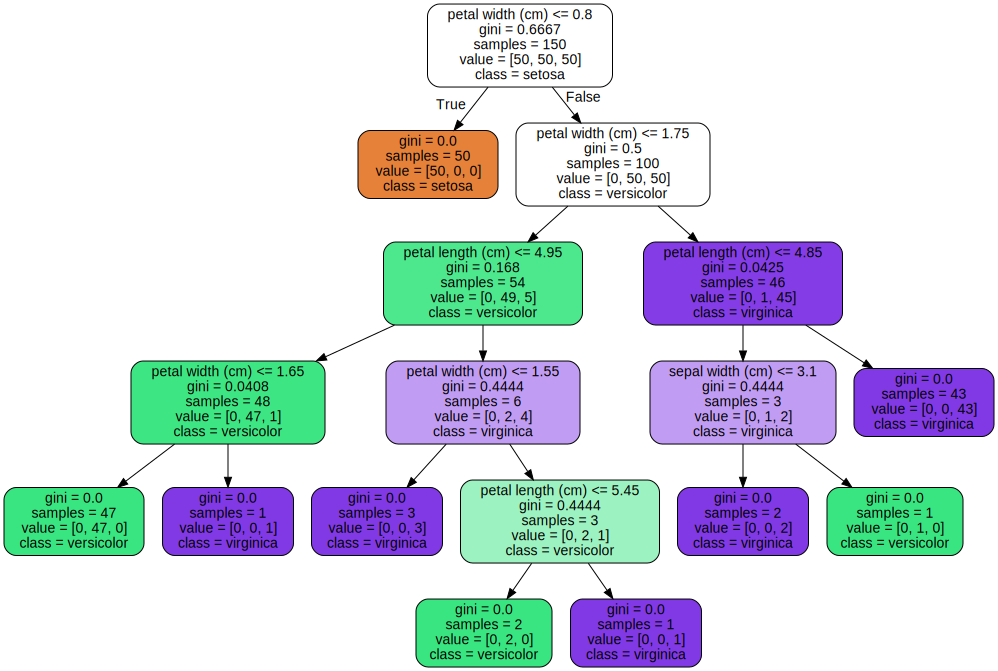

In [8]:
import graphviz
dot_data = export_graphviz(clf, out_file=None,  filled=True, rounded=True,
                                                  feature_names=iris.feature_names, class_names=iris.target_names)
graph = graphviz.Source(dot_data)
graph

##### 1.3.2 Graphvizがインストールされていない場合

`Graphviz`がインストールされていない場合はDOTフォーマットデータをテキスト出力し、    
出力されたものをコピーし[Webgraphviz](http://www.webgraphviz.com/)にペーストしGenerate Graphをクリックすると以下のような図が表示される。

In [9]:
dot_data = export_graphviz(clf, out_file=None,  filled=True, rounded=True,
                                                  feature_names=iris.feature_names, class_names=iris.target_names)
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="petal width (cm) <= 0.8\ngini = 0.6667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa", fillcolor="#e5813900"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa", fillcolor="#e58139ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor", fillcolor="#39e58100"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor", fillcolor="#39e581e5"] ;
2 -> 3 ;
4 [label="petal width (cm) <= 1.65\ngini = 0.0408\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor", fillcolor="#39e581fa"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor", fillcolor="#39e581ff"] ;
4 -> 5 ;
6 [l

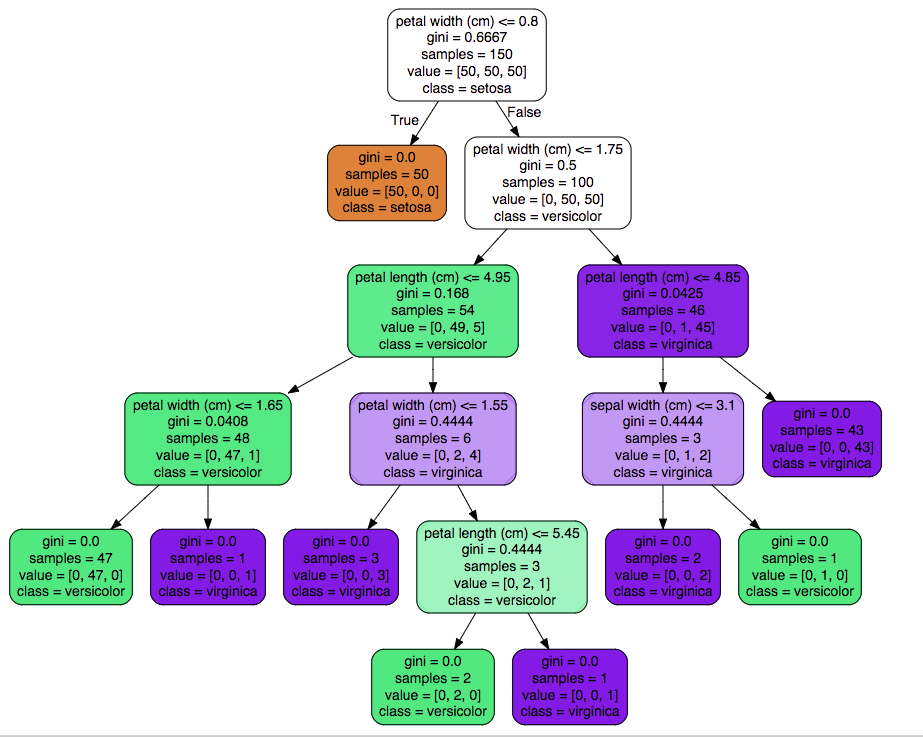

#### 1.4 K-fold cross validation

10-fold cross validationを行い、モデルの性能評価を行う時は以下のようにスクリプトを書けば良い。

In [10]:
clf = DecisionTreeClassifier(random_state=None)
cross_val_score(clf, X_iris, y_iris, cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  0.93333333,  1.        ,  1.        ])

このようにcross validationを行う時に、以下のように`max_depth`の値を変化させて性能の差を比較し、  
最もよい性能の時のmax_depthを採用するという判断もできる。

In [11]:
for max_depth in range(1, 6):
    clf = DecisionTreeClassifier(random_state=None, max_depth=max_depth)
    score = cross_val_score(clf, X_iris, y_iris, cv=10)
    print(f'max_depth={max_depth}, score={score.mean()}')

max_depth=1, score=0.6666666666666667
max_depth=2, score=0.9533333333333334
max_depth=3, score=0.96
max_depth=4, score=0.96
max_depth=5, score=0.9533333333333334


今回の例では、`max_depth=1`の時は少しスコアが低いが、それ以降はほぼ同性能である。

数値だけでなくグラフにして`max_depth`の変化に伴う正答率の変化を見たい場合は以下のように書くと良い。

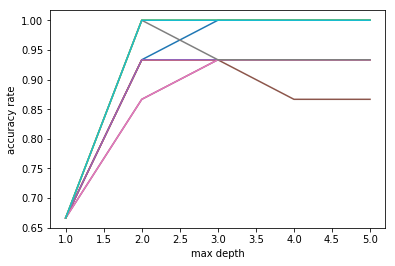

In [12]:
accuracy_scores = []

for max_depth in range(1, 6):
    clf = DecisionTreeClassifier(random_state=None, max_depth=max_depth)
    score = cross_val_score(clf, X_iris, y_iris, cv=10)
    accuracy_scores.append(score)


X = list(range(1, 6))
plt.plot(X, accuracy_scores)

plt.xlabel('max depth')
plt.ylabel('accuracy rate')
plt.show()

### 2. DecisionTreeRegressor

目的変数が数値情報の場合は[DecisionTressClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)の代わりに[DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeRegressor.html#sklearn.tree.ExtraTreeRegressor)を用いれば同様の解析ができる。

#### 2.1 解析するデータの読み込み

In [13]:
boston = load_boston()
X_boston = pd.DataFrame(boston.data)
y_boston = boston.target

In [14]:
X_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
y_boston[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [16]:
X_boston.shape

(506, 13)

#### 2.2 機械学習

In [17]:
regressor = DecisionTreeRegressor()
regressor.fit(X_boston, y_boston)
y_predicted = regressor.predict(X_boston)
y_predicted[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

[mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)関数を用いてRoot Mean Square Error (RMSE) を求める。

In [18]:
mean_squared_error(y_boston, y_predicted)

0.0

性能が良すぎてmean_squared_errorなどが正しく動いているかわかりにくい。  
これはデフォルトでは、完全にデータを分離されるかあるいはノードに含まれるデータが最低2つになるまで  
ノードを伸長していくように設定されているからである。  

そこで`max_depth=3`とし決定木の最大の深さを3に設定してみる。  
max_depthの値を小さくするほどより不正確になるが、過学習しなくなったり、決定木は簡単になり解釈がしやすくなることもある。

In [19]:
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_boston, y_boston)
y_predicted = regressor.predict(X_boston)
y_predicted[:5]

array([ 22.9052    ,  22.9052    ,  33.34883721,  33.34883721,  33.34883721])

[mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)関数を用いてRoot Mean Square Error (RMSE) を求める。

In [20]:
mean_squared_error(y_boston, y_predicted)

15.423306191629861

#### 2.3 決定木の視覚化

##### Graphvizがインストールされている場合

1.3.1と同様にスクリプトを実行することで決定木を視覚化できる。  
`max_depth=3`としているので一番上のノードから最大で３個までしかノードが発生していないのがわかる。

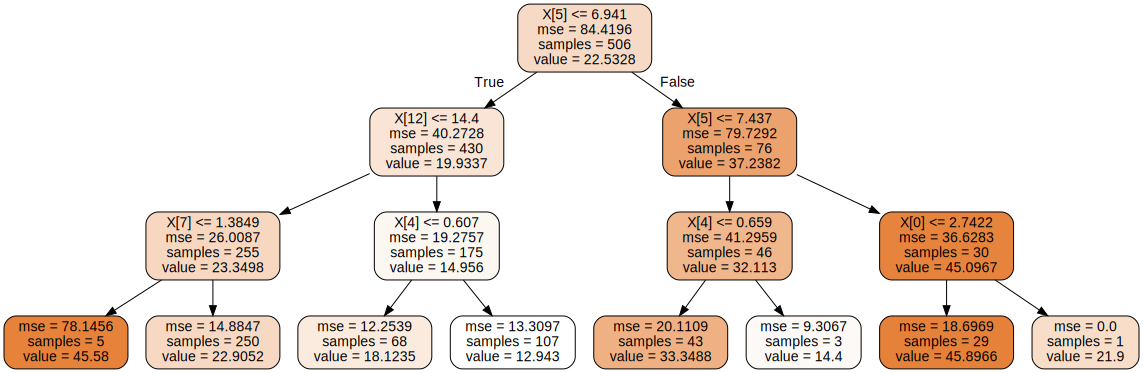

In [21]:
import graphviz
dot_data = export_graphviz(regressor, out_file=None,  filled=True, rounded=True, class_names=boston)
graph = graphviz.Source(dot_data)
graph

##### Graphvizがインストールされていない場合については1.3.2と同様なので省略する。

#### 2.4 K-fold cross validation

10-fold cross validationを行い、モデルの性能評価を行う時は以下のようにスクリプトを書けば良い。

In [22]:
regressor = DecisionTreeRegressor(max_depth=3)
cross_val_score(regressor, X_iris, y_iris, cv=10)

array([ 1.        ,  1.        ,  1.        ,  0.99792244,  0.        ,
        0.        ,  0.99792244,  0.        ,  0.        ,  0.        ])

このようにcross validationを行う時に、以下のように`max_depth`の値を変化させて性能の差を比較し、  
最もよい性能の時のmax_depthを採用するという判断もできる。

In [23]:
for max_depth in range(1, 10):
    regressor = DecisionTreeRegressor(random_state=None, max_depth=max_depth)
    score = cross_val_score(regressor, X_iris, y_iris, cv=10)
    print(f'max_depth={max_depth}, score={score.mean()}')

max_depth=1, score=0.2901063693451237
max_depth=2, score=0.49216283351605944
max_depth=3, score=0.49958448753462603
max_depth=4, score=0.6
max_depth=5, score=0.5700000000000001
max_depth=6, score=0.6
max_depth=7, score=0.6
max_depth=8, score=0.6
max_depth=9, score=0.5700000000000001


今回の例では、`max_depth=1, 2, 3`の時はスコアが低いが、それ以降はほぼ同性能である。